In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
# Opciones de matplotlib
rc=plt.rcParams
rc['figure.figsize']=[15,5]

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
import networkx as nx

In [57]:
def HITman(n_iter, G):
    for i in range(len(G.nodes)):
        G.add_node(i,auth=[1,0],hub=[1,0])
        
    for k in range(n_iter):
        for nodo in G.nodes:
            G.nodes[nodo]['auth'][1]=0
            G.nodes[nodo]['hub'][1]=0
            for g_pred in G.predecessors(nodo):
                G.nodes[nodo]['auth'][1]+=G.nodes[g_pred]['hub'][0]
            for g_pred in G.successors(nodo):
                G.nodes[nodo]['hub'][1]+=G.nodes[g_pred]['auth'][0]
        for nodo  in G.nodes:
            G.nodes[nodo]['auth'][0]=G.nodes[nodo]['auth'][1]
            G.nodes[nodo]['hub'][0]=G.nodes[nodo]['hub'][1]
    total_auth=0
    total_hub=0
    dicc=nx.hits(G,max_iter=n_iter,tol=0)
    for g in G.nodes:
          total_auth+=G.nodes[g]['auth'][1]
          total_hub+=G.nodes[g]['hub'][1]
    for g in G.nodes:
          print('Nodo ',g,'\n','-'*64)
          print('HUB  :', G.nodes[g]['hub'][1]/total_hub)
          print('AUTH  :', G.nodes[g]['auth'][1]/total_hub)



Creamos una red aleatoria dirigida con el algoritmo de erdos renyi, el cual dada cierta probabilidad un nodo i se enlaza con un nodo j,en este ejemplo de prueba son 25 nodos con el 15% de probabilidad de que se forme un enlace entre dos nodos cualquiera

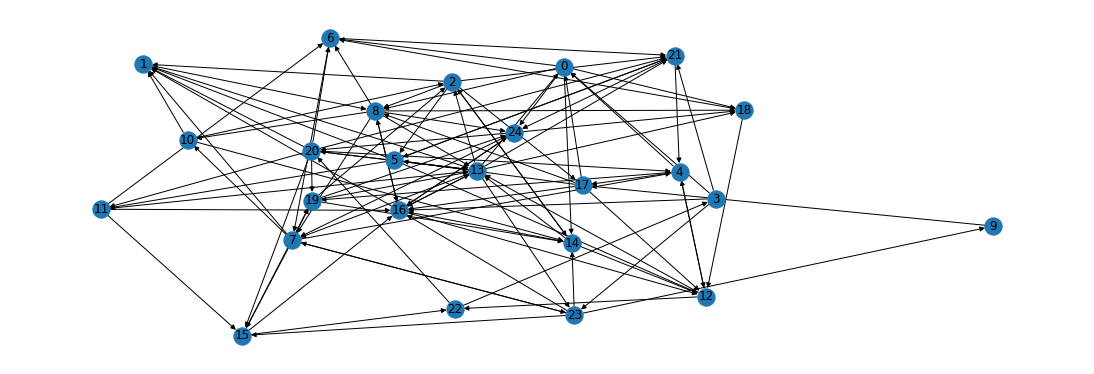

In [62]:
D = nx.erdos_renyi_graph(25, 0.15, seed=None, directed=True) # the GN graph
G = D.to_directed()  # the undirected version
nx.draw(G,with_labels=True,pos = nx.spring_layout(G))

In [66]:
%%timeit
HITman(5, G)

Se han truncado las últimas 5000 líneas del flujo de salida.
 ----------------------------------------------------------------
HUB  : 0.044447312938341726
AUTH  : 0.040087202214477285
Nodo  1 
 ----------------------------------------------------------------
HUB  : 0.023708102061012867
AUTH  : 0.06190209830328586
Nodo  2 
 ----------------------------------------------------------------
HUB  : 0.04972534170933551
AUTH  : 0.03971429800783099
Nodo  3 
 ----------------------------------------------------------------
HUB  : 0.04494929937036559
AUTH  : 0.0010039728640477317
Nodo  4 
 ----------------------------------------------------------------
HUB  : 0.028025185376418113
AUTH  : 0.03288728253230641
Nodo  5 
 ----------------------------------------------------------------
HUB  : 0.05883280983319708
AUTH  : 0.02349296501871692
Nodo  6 
 ----------------------------------------------------------------
HUB  : 0.023378225262825753
AUTH  : 0.04961060195344434
Nodo  7 
 ---------------------

In [68]:
%%timeit
hubs, authorities = nx.hits(G, max_iter = 5, tol=1e-08, normalized = True) 
print("Hub scores: ", hubs) 
print("Authority scores: ", authorities)

Hub scores:  {0: 0.04443501627484523, 1: 0.023958945485396035, 2: 0.04875846110944052, 3: 0.04495754833481046, 4: 0.027584800095539094, 5: 0.05911609430325487, 6: 0.023484946371648375, 7: 0.04421402869396468, 8: 0.07609528850805973, 9: 0.0030258003917125404, 10: 0.0276580742331895, 11: 0.034808950264791534, 12: 0.023872839169425952, 13: 0.08639980849337445, 14: 0.05060247569797805, 15: 0.025991136672011524, 16: 0.05481919383546309, 17: 0.0479270436666366, 18: 0.01961420682591374, 19: 0.040219601401799476, 20: 0.07987839036886676, 21: 0.019810791685303836, 22: 0.005313721096860467, 23: 0.04509711380030402, 24: 0.04235572321940944}
Authority scores:  {0: 0.04031614541267183, 1: 0.06128113692328595, 2: 0.03992846798329065, 3: 0.0010355758702215944, 4: 0.032697393357429896, 5: 0.022703629224512075, 6: 0.04966344908506855, 7: 0.053288550132461525, 8: 0.04285541947423942, 9: 0.008788847215903945, 10: 0.02344673790479225, 11: 0.04392644759352326, 12: 0.05060513634162749, 13: 0.079623638356541

Al contar el tiempo promedio de varios loops notamos que el de netwoorkx si es bastante mas rapido que el algoritmo hecho en clase :(

Ahora creamos una red con 10000 nodos y una probabilidad de enlace del 10% y corremos el algoritmo de hits

In [69]:
D = nx.erdos_renyi_graph(10000, 0.1, seed=None, directed=True) # the GN graph
G = D.to_directed()  # the undirected version
#nx.draw(G,with_labels=True,pos = nx.spring_layout(G))

In [70]:
G1=HITman(1,G)


Se han truncado las últimas 5000 líneas del flujo de salida.
Nodo  8750 
 ----------------------------------------------------------------
HUB  : 0.00010175008141006022
AUTH  : 0.00010085052273354692
Nodo  8751 
 ----------------------------------------------------------------
HUB  : 9.795194477589295e-05
AUTH  : 9.455361199795381e-05
Nodo  8752 
 ----------------------------------------------------------------
HUB  : 0.00010085052273354692
AUTH  : 0.00010085052273354692
Nodo  8753 
 ----------------------------------------------------------------
HUB  : 9.645268031503744e-05
AUTH  : 9.645268031503744e-05
Nodo  8754 
 ----------------------------------------------------------------
HUB  : 0.00010354919876308683
AUTH  : 0.00010065062080543285
Nodo  8755 
 ----------------------------------------------------------------
HUB  : 9.785199381183591e-05
AUTH  : 0.00010075057176948989
Nodo  8756 
 ----------------------------------------------------------------
HUB  : 0.00010314939490685869
AU